In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv('./Dataset/churn_data.csv')
customer_data = pd.read_csv('./Dataset/customer_data.csv')
internet_data = pd.read_csv('./Dataset/internet_data.csv')

In [3]:
churn_data.sample(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3038,5897-ZYEKH,67,Yes,One year,Yes,Electronic check,105.60,7112.15,No
6971,7240-FQLHE,18,Yes,Month-to-month,No,Bank transfer (automatic),99.75,1836.25,Yes
1831,3402-XRIUO,22,Yes,Month-to-month,Yes,Mailed check,63.55,1381.8,No
4635,9068-FHQHD,40,Yes,Two year,No,Bank transfer (automatic),20.15,777.35,No
1326,6682-VCIXC,43,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [4]:
customer_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
5561,5088-QZLRL,Male,0,No,No
2884,5248-RPYWW,Female,1,Yes,Yes
6293,7977-HXJKU,Male,0,No,Yes
2579,4361-FEBGN,Male,0,No,No
1805,7860-KSUGX,Male,0,Yes,Yes


In [5]:
internet_data.sample(5)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1487,5035-PGZXH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
4123,8910-LEDAG,No,Fiber optic,No,No,No,No,No,No
6272,4636-OLWOE,No,DSL,No,Yes,Yes,Yes,No,No
2776,7503-QQRVF,No,Fiber optic,No,Yes,No,No,No,No
6525,2400-FEQME,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [6]:
m1 = pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [7]:
telecom_data = pd.merge(m1,internet_data,how='inner',on='customerID')

In [8]:
telecom_data.sample(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
6838,2025-JKFWI,13,Yes,Month-to-month,Yes,Mailed check,99.00,1301.7,Yes,Male,...,No,No,Yes,Fiber optic,No,No,No,Yes,Yes,Yes
3561,5998-VVEJY,26,Yes,Month-to-month,Yes,Electronic check,80.50,2088.8,Yes,Male,...,No,No,Yes,Fiber optic,No,No,No,Yes,No,No
545,7129-AZJDE,34,Yes,One year,Yes,Bank transfer (automatic),78.95,2647.2,No,Male,...,Yes,Yes,No,Fiber optic,No,No,No,No,No,Yes
5271,6507-DTJZV,13,Yes,Month-to-month,No,Credit card (automatic),66.40,831.75,No,Male,...,No,Yes,No,DSL,No,No,No,No,Yes,Yes
1015,3863-IUBJR,12,Yes,One year,No,Credit card (automatic),53.65,696.35,Yes,Male,...,Yes,Yes,No,DSL,No,No,No,No,No,Yes


In [9]:
telecom_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [10]:
telecom_data.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [11]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [12]:
telecom_data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
telecom_data['PhoneService'] = telecom_data.PhoneService.map({'Yes':1,'No':0})
telecom_data['PaperlessBilling'] = telecom_data.PaperlessBilling.map({'Yes':1,'No':0})
telecom_data['Churn'] = telecom_data.Churn.map({'Yes':1,'No':0})
telecom_data['Partner'] = telecom_data.Partner.map({'Yes':1,'No':0})
telecom_data['Dependents'] = telecom_data.Dependents.map({'Yes':1,'No':0})

In [14]:
telecom_data.sample(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2191,3988-RQIXO,1,1,Month-to-month,1,Electronic check,91.30,91.3,1,Female,...,0,0,No,Fiber optic,No,No,No,No,Yes,Yes
6452,9529-OFXHY,15,1,Month-to-month,1,Bank transfer (automatic),87.75,1242.2,0,Male,...,0,0,Yes,Fiber optic,Yes,No,No,No,Yes,No
3718,8468-EHYJA,57,1,Month-to-month,1,Electronic check,99.65,5497.05,0,Female,...,1,0,Yes,Fiber optic,Yes,No,No,No,Yes,Yes
1387,7684-XSZIY,72,1,Two year,0,Bank transfer (automatic),24.30,1643.25,0,Male,...,1,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2969,1163-VIPRI,65,1,Two year,0,Electronic check,109.30,7337.55,0,Female,...,1,1,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [15]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [16]:
telecom_data.select_dtypes(include='object').columns

Index(['customerID', 'Contract', 'PaymentMethod', 'TotalCharges', 'gender',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [17]:
Contract = pd.get_dummies(telecom_data['Contract'], prefix='Contract',drop_first=True)
print(Contract.shape)
PaymentMethod = pd.get_dummies(telecom_data['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
print(PaymentMethod.shape)
#TotalCharges = pd.get_dummies(telecom_data['TotalCharges'],drop_first=True)
#print(TotalCharges.shape)
gender = pd.get_dummies(telecom_data['gender'],prefix='gender',drop_first=True)
print(gender.shape)
MultipleLines = pd.get_dummies(telecom_data['MultipleLines'],prefix='MultipleLines',drop_first=True)
print(MultipleLines.shape)
InternetService = pd.get_dummies(telecom_data['InternetService'],prefix='InternetService',drop_first=True)
print(InternetService.shape)
OnlineSecurity = pd.get_dummies(telecom_data['OnlineSecurity'],prefix='OnlineSecurity',drop_first=True)
print(OnlineSecurity.shape)
OnlineBackup = pd.get_dummies(telecom_data['OnlineBackup'],prefix='OnlineBackup',drop_first=True)
print(OnlineBackup.shape)
DeviceProtection = pd.get_dummies(telecom_data['DeviceProtection'],prefix='DeviceProtection',drop_first=True)
print(DeviceProtection.shape)
TechSupport = pd.get_dummies(telecom_data['TechSupport'],prefix='TechSupport',drop_first=True)
print(TechSupport.shape)
StreamingTV = pd.get_dummies(telecom_data['StreamingTV'],prefix='StreamingTV',drop_first=True)
print(StreamingTV.shape)
StreamingMovies = pd.get_dummies(telecom_data['StreamingMovies'],prefix='StreamingMovies',drop_first=True)
print(StreamingTV.shape)

(7043, 2)
(7043, 3)
(7043, 1)
(7043, 2)
(7043, 2)
(7043, 2)
(7043, 2)
(7043, 2)
(7043, 2)
(7043, 2)
(7043, 2)


In [18]:
telecom_data = telecom_data.drop(['Contract', 'PaymentMethod', 'gender',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1)

In [19]:
telecom_data = pd.concat([telecom_data,Contract], axis=1)
telecom_data = pd.concat([telecom_data,PaymentMethod], axis=1)
#telecom_data = pd.concat([telecom_data,TotalCharges], axis=1)
telecom_data = pd.concat([telecom_data,gender], axis=1)
telecom_data = pd.concat([telecom_data,MultipleLines], axis=1)
telecom_data = pd.concat([telecom_data,InternetService], axis=1)
telecom_data = pd.concat([telecom_data,OnlineSecurity], axis=1)
telecom_data = pd.concat([telecom_data,OnlineBackup], axis=1)
telecom_data = pd.concat([telecom_data,DeviceProtection], axis=1)
telecom_data = pd.concat([telecom_data,TechSupport], axis=1)
telecom_data = pd.concat([telecom_data,StreamingTV], axis=1)
telecom_data = pd.concat([telecom_data,StreamingMovies], axis=1)

In [20]:
telecom_data

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.5,0,0,1,1,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.9,0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7041,8361-LTMKD,4,1,1,74.40,306.6,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
telecom_data['TotalCharges'] =pd.to_numeric(telecom_data['TotalCharges'],errors='coerce')

In [22]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

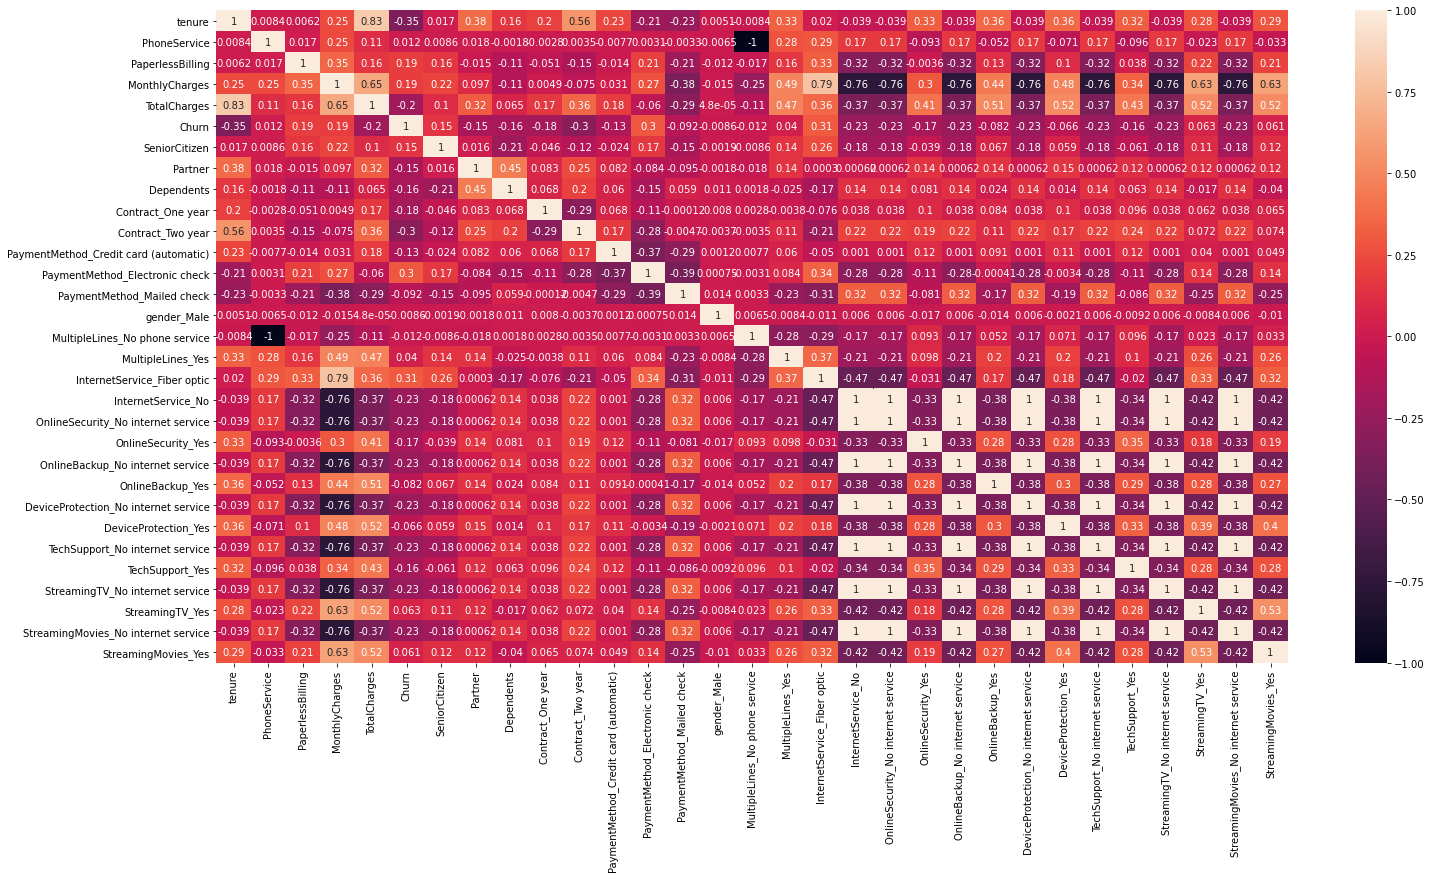

In [26]:
plt.figure(figsize=(24,12))
sns.heatmap(telecom_data.corr(),annot=True)

In [27]:
num_telecom = telecom_data[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]

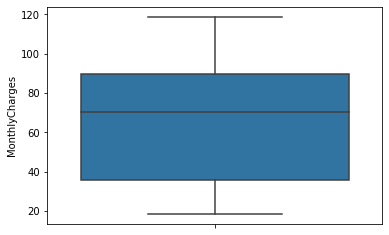

In [35]:
sns.boxplot(y='MonthlyCharges',data=num_telecom)

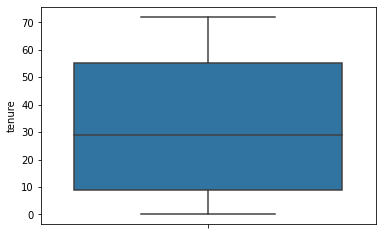

In [36]:
sns.boxplot(y='tenure',data=num_telecom)

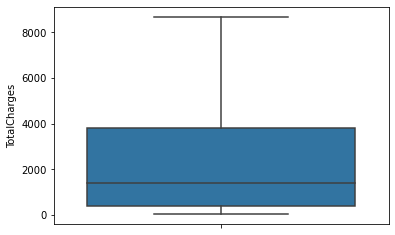

In [38]:
sns.boxplot(y='TotalCharges',data=num_telecom)

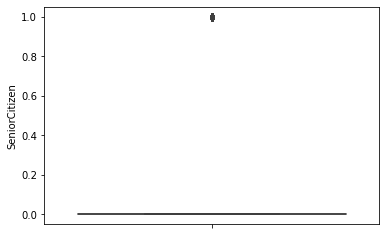

In [39]:
sns.boxplot(y='SeniorCitizen',data=num_telecom)

In [41]:
telecom_data.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [44]:
telecom_data.dropna(inplace=True)

In [45]:
telecom_data.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

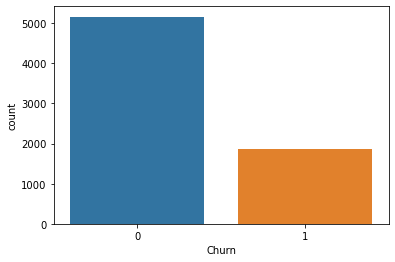

In [47]:
sns.countplot(telecom_data['Churn'])

In [53]:
X = telecom_data.drop(['Churn', 'customerID'],axis=1)
y= telecom_data['Churn']

In [49]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=100)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4922, 30)
(2110, 30)
(4922,)
(2110,)


In [56]:
import statsmodels.api as sm

In [57]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 30 Jun 2020   Deviance:                       4009.4
Time:                        00:48:35   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.6731      0.911      1.836      0.066      -0.113       3.459
tenure                                   -0.0619      0.008     -8.015      0.000      -0.077      -0.047
PhoneService                              1.3119      0.842      1.558      0.119      -0.339       2.963
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -0.0725      0.039     -1.880      0.060      -0.148       0.003
TotalCharges                              0.0003   8.73e-05      3.705      0.000       0.000       0.000
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No phone service            0.3612      0.130      2.771      0.006       0.106       0.617
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_No internet service       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_No internet service         -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_No internet service     -0.3970      0.140     -2.831      0.005      -0.672      -0.122
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
TechSuppo

In [60]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logr,12)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

c:\users\aditya\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\aditya\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\aditya\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

[False  True  True False False False False False  True  True False  True
 False False False False  True False False  True False  True  True False
  True  True  True False False False]
[13  1  1 17 19 11 18  2  1  1  5  1 15 14  8 12  1  9  4  1  3  1  1 16
  1  1  1  6  7 10]


In [62]:
telecom_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [63]:
columns = ['PhoneService','PaperlessBilling','Partner','Dependents','TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service','DeviceProtection_No internet service','OnlineBackup_Yes', 'OnlineSecurity_Yes',
          'InternetService_Fiber optic']

In [65]:
logr.fit(X_train[columns],y_train)

LogisticRegression()

In [66]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train[columns])),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2269.9
Date:                Tue, 30 Jun 2020   Deviance:                       4539.8
Time:                        01:06:26   Pearson chi2:                 4.89e+03
No. Iterations:                    18                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.3575      0.137     -2.601      0.009      -0.627      -0.088
PhoneService                            -0.2516      0.143     -1.756      0.079      -0.532       0.029
PaperlessBilling                         0.4098      0.084      4.889      0.000       0.246       0.574
Partner                                 -0.4067      0.082     -4.976      0.000      -0.567      -0.247
Dependents                              -0.2926      0.098     -2.982      0.003      -0.485      -0.100
TechSupport_No internet service         -0.6320      0.052    -12.190      0.000      -0.734      -0.530
TechSupport_Yes                         -0.8779      0.091     -9.663      0.000      -1.056      -0.700
StreamingTV_No internet service         -0.6320      0.052    -12.190      0.000      -0.734      -0.530
DeviceProtection_No internet service    -0.6320      0.052    -12.190      0.000      -0.734      -0.530
OnlineBackup_Yes                        -0.6535      0.081     -8.035      0.000      -0.813      -0.494
OnlineSecurity_Yes                      -0.8855      0.093     -9.493      0.000      -1.068      -0.703
InternetService_Fiber optic              0.9061      0.097      9.337      0.000       0.716       1.096
========================================================================================================
"""

In [70]:
pred_prob = logr.predict_proba(X_test[columns])

In [71]:
pred_prob_df = pd.DataFrame(pred_prob)

In [72]:
pred_prob_1 = pred_prob_df.iloc[:,[1]]

In [73]:
pred_prob_1.head()

,1
0,0.668097
1,0.412318
2,0.110419
3,0.668097
4,0.039411


In [74]:
y_test_df = pd.DataFrame(y_test)
y_test_df['CustID'] = y_test_df.index

In [75]:
pred_prob_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [76]:
pred_final = pd.concat([y_test_df,pred_prob_1],axis=1)

In [78]:
pred_final= pred_final.rename(columns={ 1 : 'Churn_Problity'})

In [79]:
pred_final.sample(5)

,Churn,CustID,Churn_Problity
1223,0,2458,0.357902
1270,0,5747,0.086445
1915,0,2046,0.341027
286,0,5661,0.110419
1822,1,6043,0.510814


In [80]:
pred_final['predicted'] = pred_final.Churn_Problity.map( lambda x: 1 if x > 0.5 else 0)

In [81]:
from sklearn import metrics

In [82]:
metrics.accuracy_score( pred_final.Churn, pred_final.predicted)

0.7720379146919432

In [83]:
confusion = metrics.confusion_matrix( pred_final.Churn, pred_final.predicted )
confusion

array([[1368,  160],
       [ 321,  261]], dtype=int64)